<a href="https://colab.research.google.com/github/Pornphankub/BSC_DPDM2025/blob/main/Ch3_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [166]:
import pandas as pd

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
df = pd.read_csv('/content/drive/MyDrive/BSC_DPDM2025_student/Data/flooding database.csv')

In [169]:
df.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


# Data Cleaning

## missing data

## Check missing data

In [170]:
df.isnull().any()

,0
system:index,False
index,False
threshold_type,False
glide_index,True
dfo_country,False
dfo_other_country,True
dfo_centroid_x,False
dfo_centroid_y,False
dfo_began,False
dfo_ended,True


In [171]:
df.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### Drop record ที่มี missing ออก

Drop ถ้ามี missing

In [172]:
df.shape

(913, 23)

In [173]:
flood_drop1 = df.dropna()

In [174]:
flood_drop1.shape

(13, 23)

Drop เฉพาะเกิด missing ในตัวแปรที่เราจะใช้


*   dfo_country
*   dfo_other_country
*   dfo_began
*   dfo_ended
*   dfo_cause
*   dfo_severity



In [175]:
flood_drop2 = df.dropna(subset=['dfo_country','dfo_other_country','dfo_began','dfo_ended','dfo_cause'
                              ,'dfo_severity'])
flood_drop2.shape

(637, 23)

In [176]:
flood_drop2.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


### เติม Dummy

In [177]:
flood_drop3 = df[df['dfo_other_country'].isnull()]

In [178]:
flood_drop3.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
172,DFO_2415_From_20040110_to_20040119,2415,std,0,Iran,NaN,51.439491,29.466641,1/10/04,1/19/04,...,Heavy rain,1.0,7017.61,23986.0,23986.0,116060,1,0,-92074,NaN
383,DFO_3089_From_20070530_to_20070603,3089,std,0,Dominican Republic,NaN,-71.053795,19.547861,5/30/07,6/3/07,...,Heavy rain,1.0,100.92,13819.0,13819.0,11672,1,0,2147,NaN
387,DFO_3097_From_20070611_to_20070624,3097,std,LS-2007-000080-BGD,Bangladesh,NaN,91.953546,22.397464,6/11/07,6/24/07,...,Heavy rain,1.0,20493.38,4536692.0,4536692.0,8995159,1,0,-4458467,NaN
412,DFO_3136_From_20070721_to_20071015,3136,std,0,Bangladesh,NaN,91.233643,23.916419,7/21/07,10/15/07,...,Heavy rain,1.0,78785.53,27712991.0,27712998.0,55288622,0,-7,-27575631,NaN
428,DFO_3166_From_20070726_to_20071010,3166,std,FL-2007-000132-BFA,Ghana,NaN,0.612005,13.037658,7/26/07,10/10/07,...,Heavy rain,1.5,7621.96,325408.0,325408.0,624312,1,0,-298904,NaN


In [179]:
flood_filldummy = df.fillna({'dfo_other_country' : 'unknow'})

In [180]:
flood_filldummy.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


In [181]:
flood_filldummy.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,0
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติม missing ด้วยค่ากลาง

In [182]:
df.groupby('dfo_cause').count()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_displaced,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
dfo_cause,,,,,,,,,,,,,,,,,,,,,
Dam,13,13,13,11,13,10,13,13,13,13,...,13,13,13,13,13,13,13,13,13,0
Heavy rain,749,749,749,554,749,530,749,749,749,748,...,749,749,749,748,748,749,749,749,749,16
"Snowmelt, Ice, Rain",52,52,52,45,52,45,52,52,52,52,...,52,52,52,52,52,52,52,52,52,7
"Tropical Storm, Surge",97,97,97,71,97,53,97,97,97,97,...,97,97,97,97,97,97,97,97,97,1


In [183]:
flood_fillmode = df.fillna({'dfo_cause' : 'Heavy rain'})

In [184]:
flood_fillmode.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติมด้วย ตัวแทนของกลุ่ม

In [185]:
df.groupby(['dfo_severity','dfo_cause']).count()

system:index  index  threshold_type  \
dfo_severity dfo_cause                                                    
1.0          Dam                               9      9               9   
             Heavy rain                      464    464             464   
             Snowmelt, Ice, Rain              34     34              34   
             Tropical Storm, Surge            33     33              33   
1.5          Dam                               3      3               3   
             Heavy rain                      163    163             163   
             Snowmelt, Ice, Rain               8      8               8   
             Tropical Storm, Surge            26     26              26   
2.0          Dam                               1      1               1   
             Heavy rain                      122    122             122   
             Snowmelt, Ice, Rain              10     10              10   
             Tropical Storm, Surge            38     38              38   

                                    glide_index  dfo_country  \
dfo_severity dfo_cause                                         
1.0          Dam                              9            9   
             Heavy rain                     390          464   
             Snowmelt, Ice, Rain             29           34   
             Tropical Storm, Surge           32           33   
1.5          Dam                              1            3   
             Heavy rain                      72          163   
             Snowmelt, Ice, Rain              7            8   
             Tropical Storm, Surge           12           26   
2.0          Dam                              1            1   
             Heavy rain                      92          122   
             Snowmelt, Ice, Rain              9           10   
             Tropical Storm, Surge           27           38   

                                    dfo_other_country  dfo_centroid_x  \
dfo_severity dfo_cause                                                  
1.0          Dam                                    9               9   
             Heavy rain                           369             464   
             Snowmelt, Ice, Rain                   30              34   
             Tropical Storm, Surge                 28              33   
1.5          Dam                                    0               3   
             Heavy rain                            67             163   
             Snowmelt, Ice, Rain                    6               8   
             Tropical Storm, Surge                  7              26   
2.0          Dam                                    1               1   
             Heavy rain                            94             122   
             Snowmelt, Ice, Rain                    9              10   
             Tropical Storm, Surge                 18              38   

                                    dfo_centroid_y  dfo_began  dfo_ended  ...  \
dfo_severity dfo_cause                                                    ...   
1.0          Dam                                 9          9          9  ...   
             Heavy rain                        464        464        463  ...   
             Snowmelt, Ice, Rain                34         34         34  ...   
             Tropical Storm, Surge              33         33         33  ...   
1.5          Dam                                 3          3          3  ...   
             Heavy rain                        163        163        163  ...   
             Snowmelt, Ice, Rain                 8          8          8  ...   
             Tropical Storm, Surge              26         26         26  ...   
2.0          Dam                                 1          1          1  ...   
             Heavy rain                        122        122        122  ...   
             Snowmelt, Ice, Rain                10         10         10  ...   
            

In [186]:
flood_sever1 = df[df['dfo_severity']==1.0]
flood_sever15 = df[df['dfo_severity']==1.5]
flood_sever2 = df[df['dfo_severity']==2.0]

In [187]:
flood_sever1 = flood_sever1.fillna({'dfo_cause' : 'Heavy rain'})
flood_sever15 = flood_sever15.fillna({'dfo_cause' : 'Heavy rain'})
flood_sever2 = flood_sever2.fillna({'dfo_cause' : 'Tropical Storm, Surge'})

In [188]:
flood_fillgroup = pd.concat([flood_sever1,flood_sever15,flood_sever2])

In [189]:
flood_fillgroup.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


## Noisy Data

In [190]:
df['gfd_area']

,gfd_area
0,316.73
1,228.50
2,89.10
3,4322.47
4,740.33
...,...
908,1866.91
909,2720.37
910,10019.87
911,6467.41


### Explor data

In [191]:
from matplotlib import pyplot as plt

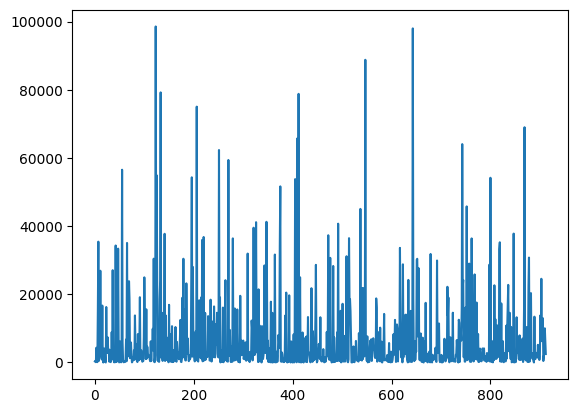

In [192]:
plt.plot(df['gfd_area'])

ใช้ histogram ดู Bin ที่เหมาะสม

(array([728.,  99.,  35.,  28.,   6.,   6.,   4.,   3.,   1.,   3.]),
 array([    0.   ,  9854.762, 19709.524, 29564.286, 39419.048, 49273.81 ,
        59128.572, 68983.334, 78838.096, 88692.858, 98547.62 ]),
 <BarContainer object of 10 artists>)

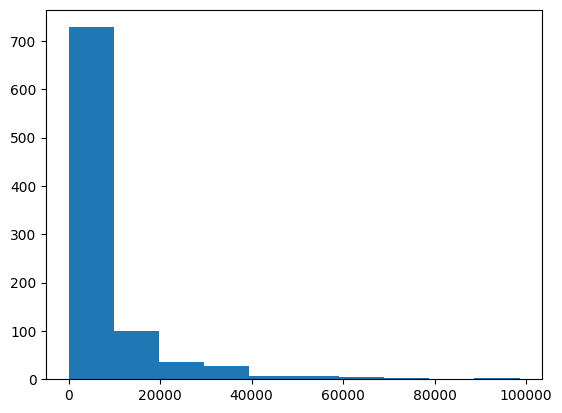

In [193]:
plt.hist(df['gfd_area'])

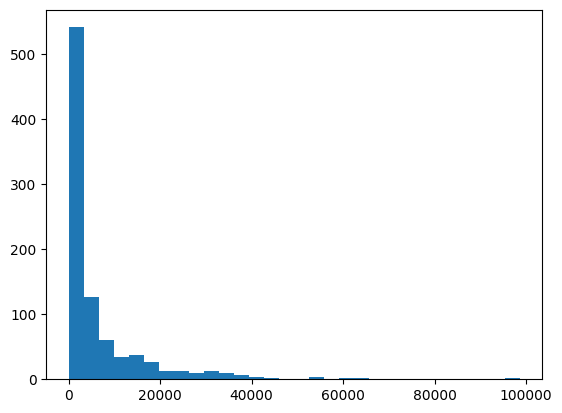

In [194]:
outputhist = plt.hist(df['gfd_area'],bins=30)

In [195]:
outputhist[1]

array([    0.        ,  3284.92066667,  6569.84133333,  9854.762     ,
       13139.68266667, 16424.60333333, 19709.524     , 22994.44466667,
       26279.36533333, 29564.286     , 32849.20666667, 36134.12733333,
       39419.048     , 42703.96866667, 45988.88933333, 49273.81      ,
       52558.73066667, 55843.65133333, 59128.572     , 62413.49266667,
       65698.41333333, 68983.334     , 72268.25466667, 75553.17533333,
       78838.096     , 82123.01666667, 85407.93733333, 88692.858     ,
       91977.77866667, 95262.69933333, 98547.62      ])

In [196]:
def get_bin_for_value(value, bins):
    if value < bins[0] or value > bins[-1]:
        return "Value out of bin range"
    for i in range(len(bins) - 1):
        if bins[i] <= value < bins[i+1]:
            return f"[{bins[i]:.2f}, {bins[i+1]:.2f})"
    # Handle the case where the value is exactly the last bin edge
    if value == bins[-1]:
        return f"[{bins[-2]:.2f}, {bins[-1]:.2f}]"


In [197]:
get_bin_for_value(2000,outputhist[1])

'[0.00, 3284.92)'

In [198]:
def put_value_into_bins(value, bins):
   for i in range(len(bins) - 1):
    if value >= bins[i] and value < bins[i+1]:
      new_val = bins[i] + (bins[i+1] - bins[i])/2
      return new_val
   return None

In [199]:
put_value_into_bins(2000,outputhist[1])

np.float64(1642.4603333333332)

In [200]:
df['gfd_area_bin'] = df['gfd_area'].apply(lambda x: put_value_into_bins(x,outputhist[1]))
# apply ใช้ในการแก้ค่าที่อยู่ในตาราง

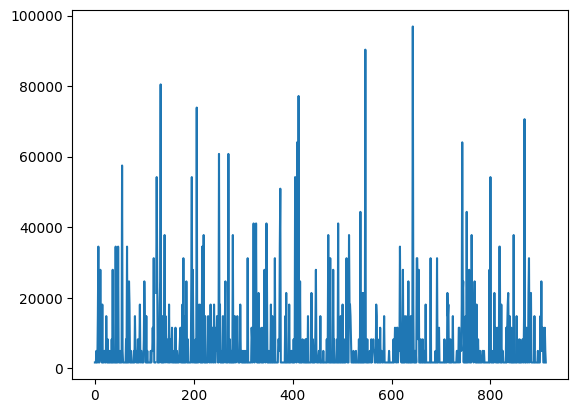

In [201]:
plt.plot(df['gfd_area_bin'])

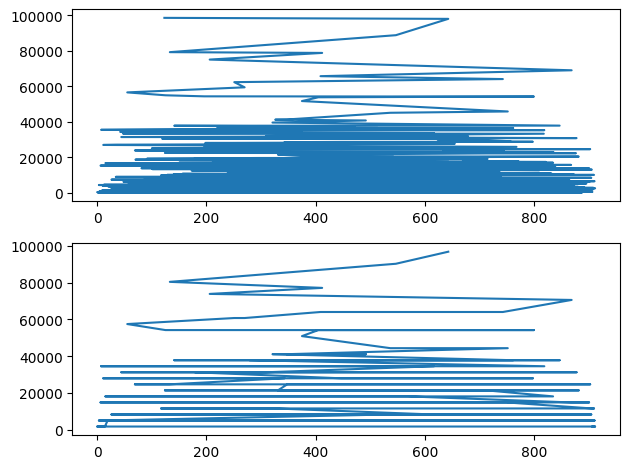

In [202]:
plt.subplot(2,1,1)
plt.plot(df['gfd_area'].sort_values())
plt.subplot(2,1,2)
plt.plot(df['gfd_area_bin'].sort_values())
plt.tight_layout()

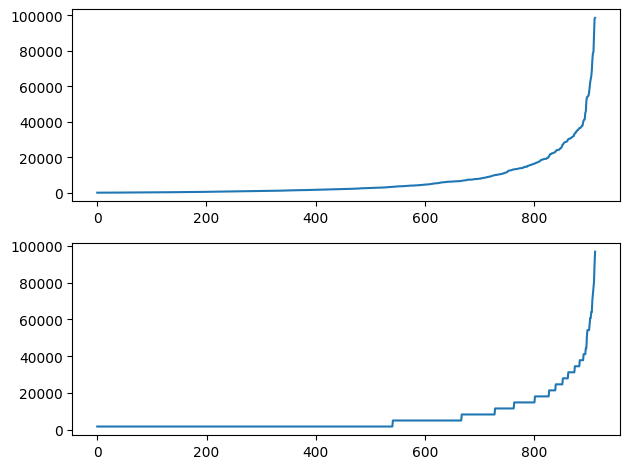

In [203]:
plt.subplot(2,1,1)
plt.plot(df['gfd_area'].sort_values().reset_index(drop=True))
plt.subplot(2,1,2)
plt.plot(df['gfd_area_bin'].sort_values().reset_index(drop=True))
plt.tight_layout()

### Outliner Removeal

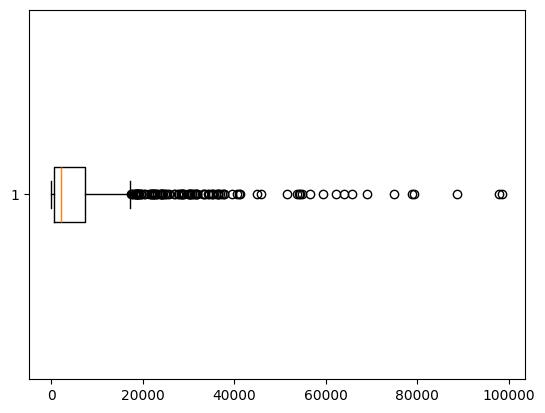

In [204]:
plt.boxplot(df['gfd_area'],vert=False);

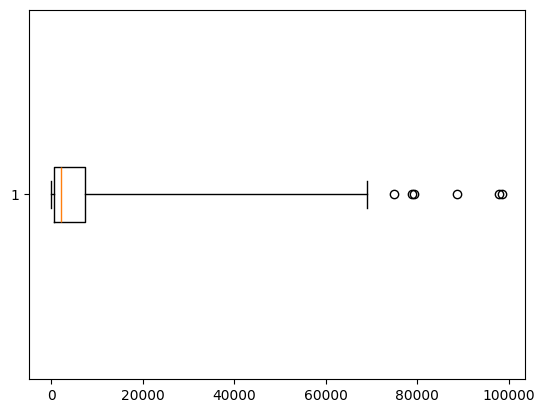

In [205]:
outputbox = plt.boxplot(df['gfd_area'],vert=False,whis=10);

In [206]:
outputbox

{'whiskers': [<matplotlib.lines.Line2D at 0x7e56070d0680>,
 'caps': [<matplotlib.lines.Line2D at 0x7e56070d0d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e56070d06b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e56070d11f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e56070d1490>],
 'means': []}

In [207]:
outputbox['whiskers'][0].get_xdata()

array([608.6,   0. ])

In [208]:
outputbox['whiskers'][1].get_xdata()

array([ 7354.55, 68991.93])

In [209]:
outputbox['fliers'][0].get_xdata()

array([98547.62, 79213.43, 75030.8 , 78785.53, 88773.57, 97982.77])

remove outliner

In [210]:
flood_nooutlier = df[df['gfd_area'] < outputbox['whiskers'][1].get_xdata()[1]]

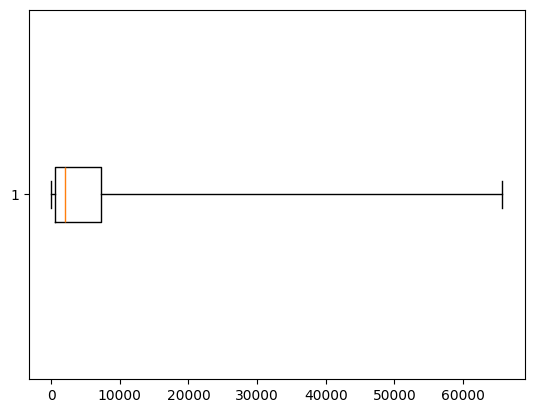

In [211]:
outputbox2 = plt.boxplot(flood_nooutlier['gfd_area'],vert=False,whis=10);

ตามหาค่า outliner

In [212]:
df[df['gfd_area'] == outputbox['fliers'][0].get_xdata()[0]]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000,gfd_area_bin
123,DFO_2208_From_20030416_to_20030528,2208,std,0,Russia,0,64.739289,55.453563,4/16/03,5/28/03,...,1.0,98547.62,1014245.0,1014245.0,931108,1,0,83137,1.0,NaN


# Data Integration

Data exploration

In [213]:
project_df = pd.read_csv('/content/drive/MyDrive/BSC_DPDM2025_student/Data/Copy of opendata_project-2.csv')
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [214]:
for i in project_df.columns:
  print(i)

row_number
project_id
name_en
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
price_min
developer_id
developer_name_en
developer_name_th
latitude
longitude
neighborhood_id
neighborhood_name_en
neighborhood_name_th
subdistrict_id
subdistrict_name_en
subdistrict_name_th
district_id
district_name_en
district_name_th
province_id
province_name_en
province_name_th
zipcode
count_elevator
count_elevator_service
count_floor
count_parking
count_tower
count_unit
count_unittype
facility_clubhouse
facility_fitness
facility_meeting
facility_park
facility_playground
facility_pool
facility_security
date_created
date_finish
date_updated
source
url_project
day


In [215]:
unit_df = pd.read_csv('/content/drive/MyDrive/BSC_DPDM2025_student/Data/Copy of opendata_unittype-2.csv')
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


In [216]:
for i in unit_df.columns:
  print(i)

row_number
unittype_id
project_id
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
area_total_min_wa
area_usable_min
price_min
count_airconditioner
count_elevator
count_floor_internal
count_parking
count_room_bath
count_room_bed
count_room_dinning
count_room_guest
count_room_kitchen
count_room_living
count_room_maid
count_room_storage
count_room_utility
date_created
date_updated
source
url_unittype
day


## Add more columns to the table (X-Data intgration)


,'developer_name_th',
                                                             'neighborhood_name_th','subdistrict_name_th',
                                                             'district_name_th','province_name_th'

In [217]:
#unit_df['project_id'].map(project_df.set_index('project_id')['name_th'])

## Deduplication

ดูก่อนว่า data duplicate ยังไง

In [218]:
project_df.duplicated().any()

np.True_

In [219]:
project_df.duplicated(keep=False).sum()

np.int64(4)

In [220]:
project_df[project_df.duplicated(keep=False)]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
138,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5610,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8103,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10204,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
project_df.duplicated(subset=['project_id'],keep=False).sum()

np.int64(6981)

In [222]:
project_df[project_df.duplicated(subset=['project_id'],keep=False)].head(20)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
8,3795.0,5f04029cb285eb00194de1dd,City park sakaeo,ซิตี้ปาร์ค สระแก้ว 2,4,Commercial,อาคารพาณิชย์,1900000.0,5f03f344b285eb00194de191,"Sa Kaeo Development Co., Ltd.",...,1.0,NaN,NaN,1.0,2020-07-07 12:05:32,2016-01-01 07:00:00,2020-12-04 10:33:25,baania,https://baania.com/th/project/ซิตี้ปาร์ค-สระแก...,2023-06-11
23,20554.0,project_7343,Baan Nantana Garden,บ้านนันทนาการ์เด้นท์,3,Townhome,ทาวน์โฮม,1490000.0,developer_10510,NaN,...,1.0,1.0,1.0,1.0,2017-05-22 11:28:57,NaN,2020-12-04 10:37:28,baania,https://baania.com/th/project/บ้านนันทนาการ์เด...,2023-06-11
24,12456.0,project_4054,Cubist Townhome Sanambinnam,คิวบิสทาวน์โฮม สนามบินน้ำ,3,Townhome,ทาวน์โฮม,3790000.0,developer_2417,"PLUS PROPERTY CO., LTD.",...,1.0,NaN,NaN,1.0,2017-02-23 13:40:12,NaN,2021-07-15 15:30:11,baania,https://baania.com/th/project/คิวบิสทาวน์โฮม-ส...,2023-06-11
34,5047.0,5f34e60ec801fb0019dacbd6,Taraville Pechabura,ธาราวิลล์เพชบุระ,3,Townhome,ทาวน์โฮม,1000000.0,5f34e256c801fb0019dacbbe,"Thanthong Property and Construction Co., Ltd.",...,NaN,NaN,NaN,1.0,2020-08-13 14:04:46,NaN,2022-08-04 15:00:08,baania,https://baania.com/th/project/ธาราวิลล์เพชบุระ...,2023-06-11
38,8813.0,project_7554,Sanamjan Lakeview,สนามจันทร์ เลควิว,3,Townhome,ทาวน์โฮม,750000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-05-30 15:53:44,NaN,2020-12-04 10:37:42,baania,https://baania.com/th/project/สนามจันทร์-เลควิ...,2023-06-11
40,8566.0,project_8784,Nara Cluster Romklao-Suvarnabhumi,นารา คลัสเตอร์ ร่มเกล้า-สุวรรณภูมิ,4,Commercial,อาคารพาณิชย์,3990000.0,developer_5776,NaN,...,1.0,1.0,NaN,1.0,2017-07-12 14:24:29,2019-01-01 07:00:00,2021-06-30 11:30:04,baania,https://baania.com/th/project/นารา-คลัสเตอร์-ร...,2023-06-11
41,2361.0,project_13214,Phuket Villa Kathu,ภูเก็ต วิลล่า กะทู้,20000,Twin house,บ้านแฝด,2463200.0,developer_8436,"Phuket Villa Co.,Ltd.",...,NaN,1.0,1.0,1.0,2018-05-10 14:27:40,2013-12-31 07:00:00,2020-12-04 10:44:55,baania,https://baania.com/th/project/ภูเก็ต-วิลล่า-กะ...,2023-06-11
43,19726.0,project_3669,Roi Pruksa Kampangsan,ร้อยพฤกษา กำแพงแสน,20000,Twin house,บ้านแฝด,1990000.0,developer_2256,"MIDA PROPERTY CO., LTD.",...,1.0,NaN,1.0,1.0,2017-01-30 11:06:01,NaN,2023-05-18 09:30:02,baania,https://baania.com/th/project/ร้อยพฤกษา-กำแพงแ...,2023-06-11
44,652.0,project_15487,We Village,วี วิลเลจ,3,Townhome,ทาวน์โฮม,2220000.0,developer_6334,NaN,...,NaN,NaN,NaN,NaN,2019-05-23 14:00:34,2018-01-01 07:00:00,2022-06-21 19:00:06,baania,https://baania.com/th/project/วี-วิลเลจ-projec...,2023-06-11


ลบข้อมูลที่ project_id ซ้ำกัน
โดยเก็บไว้เฉพาะตัวที่เป็นข้อมูลล่างสุด(ตัวล่าง)

In [223]:
project_df_dedup = project_df.drop_duplicates(subset=['project_id'],keep='last')

map data ที่ไม่มี duplicate index

In [224]:
unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

,project_id
0,ไลฟ์ แอท รัชดา - สุทธิสาร
1,บ้านสวนทรัพย์ธานี
2,สกายไลน์ อมตะ
3,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ
...,...
43369,บ้านคุรุสภา นครราชสีมา
43370,บ้านเต็มสิริ 1
43371,พระเงิน เพลส
43372,บ้านไทยวิลล่า ศรีราชา


In [225]:
unit_df['ชื่อโครงการ'] =unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

In [226]:
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,ชื่อโครงการ
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ


# Hw3 กลับไปเติมข้อมูล Column ที่จำเป็นที่เหลือ

'developer_name_th',
                                                             'neighborhood_name_th','subdistrict_name_th',
                                                             'district_name_th','province_name_th'

In [227]:
unit_df['ชื่อโครงการ'] = unit_df['project_id'].map(
    project_df_dedup.set_index('project_id')['name_th']
)

unit_df['ผู้พัฒนา'] = unit_df['project_id'].map(
    project_df_dedup.set_index('project_id')['developer_name_th']
)

unit_df['ย่าน'] = unit_df['project_id'].map(
    project_df_dedup.set_index('project_id')['neighborhood_name_th']
)

unit_df['ตำบล'] = unit_df['project_id'].map(
    project_df_dedup.set_index('project_id')['subdistrict_name_th']
)

unit_df['อำเภอ'] = unit_df['project_id'].map(
    project_df_dedup.set_index('project_id')['district_name_th']
)

unit_df['จังหวัด'] = unit_df['project_id'].map(
    project_df_dedup.set_index('project_id')['province_name_th']
)

unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร


In [228]:
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร


In [229]:
unit_df.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'ชื่อโครงการ', 'ผู้พัฒนา', 'ย่าน', 'ตำบล', 'อำเภอ', 'จังหวัด'],
      dtype='object')

## Add more data (Y-data intergration)

In [230]:
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร


สมมุติว่า database เก็บแยกชนิดบ้าน

In [231]:
house = unit_df[unit_df['propertytype_name_th']=='บ้าน']
condo = unit_df[unit_df['propertytype_name_th']=='คอนโด']

In [232]:
house.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6500000.0,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4600000.0,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2790000.0,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5300000.0,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


In [233]:
condo.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร
8,33884,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,3350000.0,...,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร
14,34574,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,15900000.0,...,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร
16,39469,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,4700000.0,...,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร


In [234]:
house.shape

(17777, 34)

In [235]:
condo.shape

(12806, 34)

In [236]:
house_condo = pd.concat([house,condo])
house_condo.shape

(30583, 34)

In [237]:
house_condo.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6500000.0,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4600000.0,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2790000.0,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5300000.0,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


## Data Transformation

ในกรณีที่ ข้อมูลใน column เดียวกันใช้ หน่วยไม่เหมือนกัน ต้องมีการแปลงข้อมูลก่อน

ทำให้หน่วยของราคา ไม่เท่ากัน (condo หน่วยบ้าน vs house หน่วยล้านบาท)

In [238]:
house['price_min'] = house['price_min']/1000000
house

/tmp/ipython-input-3989735810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_min'] = house['price_min']/1000000


,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.5000,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.6000,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.7900,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.3000,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,160.0,3.2000,...,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,บ้านณัฐชากรีนวิลล์,NaN,ปลายบาง,บางใหญ่,บางใหญ่,นนทบุรี
43363,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,Detached House,บ้าน,2.0,170.0,3.8614,...,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,กลันตา พลัส อีโค่ วิลเลจ,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,ขอนแก่น
43367,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,Detached House,บ้าน,NaN,186.0,5.3900,...,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,ชวนชม 5,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,นนทบุรี
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,0.8800,...,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา


In [239]:
from matplotlib import pyplot as plt

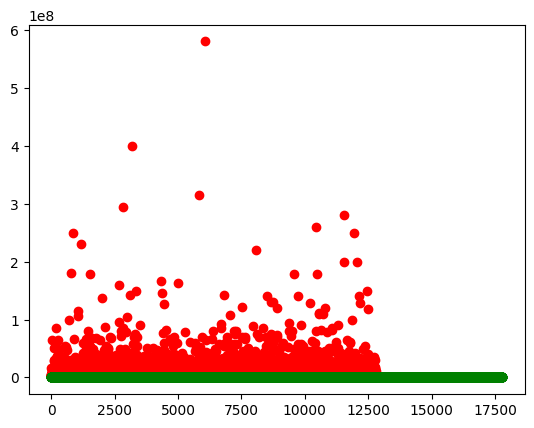

In [240]:
plt.scatter(range(len(condo['price_min'])),condo['price_min'],c='r')
plt.scatter(range(len(house['price_min'])),house['price_min'],c='g')

แปลงค่า หน่วยคอนโด ให้เป็นหลักล้านแล้วีวม Data

In [241]:
condo['price_min'] = condo['price_min']/1000000
condo_house = pd.concat([house,condo])
condo_house

/tmp/ipython-input-374768690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo['price_min'] = condo['price_min']/1000000


,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.50,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.60,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.79,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.30,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,17263,60488b2e582962001402e663,60488aeca8b9ee0013d7ebac,1 Bedroom,2,Condo,คอนโด,NaN,NaN,NaN,...,2021-03-10 16:07:33,baania,https://baania.com/th/project/เดอะ-ไพรเวซี่-พา...,2023-06-11,เดอะ ไพรเวซี่ พาร์ค รามอินทรา,บริษัท พฤกษา เรียลเอสเตท จำกัด (มหาชน),วัดไตรรัตนาราม,อนุสาวรีย์,บางเขน,กรุงเทพมหานคร
43357,32766,unittype_32126,project_13619,1 Bedroom,2,Condo,คอนโด,NaN,31.0,6.50,...,2022-05-17 15:17:54,baania,https://baania.com/th/project/วาลเด้น-อโศก-136...,2023-06-11,วาลเด้น อโศก,บริษัท ฮาบิแทท กรุ๊ป จำกัด,อโศก,คลองเตยเหนือ,วัฒนา,กรุงเทพมหานคร
43364,12599,unittype_24778,project_9877,2 Bedroom,2,Condo,คอนโด,NaN,49.0,3.50,...,2022-08-18 14:44:59,baania,https://baania.com/th/project/ซีซี-คอนโดมิเนีย...,2023-06-11,ซีซี คอนโดมิเนียม 2,บริษัท รวมโชคพัฒนา (พัทยา) จำกัด,บุญสัมพันธ์,หนองปรือ,บางละมุง,ชลบุรี
43366,11147,unittype_35831,project_15356,Studio,2,Condo,คอนโด,NaN,27.0,4.99,...,2022-09-22 14:56:47,baania,https://baania.com/th/project/ไอดีโอ-โมบิ-รางน...,2023-06-11,ไอดีโอ โมบิ รางน้ำ,บริษัท อนันดา ดีเวลลอปเม้นท์ จำกัด (มหาชน),รางน้ำ,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร


In [242]:
condo_house[condo_house['price_min'] > 300]

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
30469,21591,63f6e58e9b028e00130ae6f6,63f6e3b09b028e00130ae6e5,บ้านเดี่ยวสามชั้น,1,Detached House,บ้าน,NaN,2918.00,385.0,...,2023-02-23 11:05:42,baania,https://baania.com/th/project/อสงไขย-63f6e3b09...,2023-06-11,อสงไขย,บริษัท อาเมทัส ดีเวลลอปเม้นท์ จำกัด,เขาพระตำหนัก,หนองปรือ,บางละมุง,ชลบุรี
11071,11195,unittype_36249,project_15531,Penthouse,2,Condo,คอนโด,NaN,844.56,400.0,...,2023-05-27 07:19:29,baania,https://baania.com/th/project/บันยัน-ทรี-เรสซิ...,2023-06-11,บันยัน ทรี เรสซิเดนซ์ ริเวอร์ไซด์ กรุงเทพ,บริษัท เนอวานา ไดอิ จำกัด (มหาชน),คลองสาน,คลองสาน,คลองสาน,กรุงเทพมหานคร
19928,4397,unittype_7639,project_2540,Penthouse,2,Condo,คอนโด,NaN,1050.00,315.0,...,2020-10-14 00:56:43,baania,https://baania.com/th/project/โฟร์ซีซั่นส์-ไพร...,2023-06-11,โฟร์ซีซั่นส์ ไพรเวท เรสซิเด้นซ์,บริษัท คันทรี่ กรุ๊ป ดีเวลลอปเมนท์ จำกัด (มหาชน),ยานาวา,ยานนาวา,สาทร,กรุงเทพมหานคร
20668,34097,unittype_37324,project_16305,Penthouse,2,Condo,คอนโด,NaN,1182.00,580.0,...,2020-10-14 00:55:50,baania,https://baania.com/th/project/เดอะ-สุโขทัย-เรส...,2023-06-11,เดอะ สุโขทัย เรสซิเด้นซ์,บริษัท เอชเคอาร์ อินเตอร์เนชั่นแนล (ประเทศไทย)...,สาทร,ทุ่งมหาเมฆ,สาทร,กรุงเทพมหานคร


In [243]:
condo_house[condo_house['price_min'] > 300]['url_unittype'].values

array(['https://baania.com/th/project/อสงไขย-63f6e3b09b028e00130ae6e5/บ้านเดี่ยวสามชั้น-63f6e58e9b028e00130ae6f6',
       'https://baania.com/th/project/บันยัน-ทรี-เรสซิเดนซ์-ริเวอร์ไซด์-กรุงเทพ-15531/penthouse-unittype_36249',
       'https://baania.com/th/project/โฟร์ซีซั่นส์-ไพรเวท-เรสซิเด้นซ์-2540/penthouse-unittype_7639',
       'https://baania.com/th/project/เดอะ-สุโขทัย-เรสซิเด้นซ์-16305/penthouse-unittype_37324'],
      dtype=object)

## Column Alignment

สลับ column ของ data condo

In [244]:
condo.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,3.70,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,4.20,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร
8,33884,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,3.35,...,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร
14,34574,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,15.90,...,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร
16,39469,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,4.70,...,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร


In [245]:
condo.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'ชื่อโครงการ', 'ผู้พัฒนา', 'ย่าน', 'ตำบล', 'อำเภอ', 'จังหวัด'],
      dtype='object')

In [246]:
columns_titles = ['ชื่อโครงการ','ผู้พัฒนา', 'ย่าน', 'ตำบล', 'อำเภอ', 'จังหวัด','row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day']

In [247]:
condo_swap = condo.reindex(columns=columns_titles)
condo_swap.head()

,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด,row_number,unittype_id,project_id,name_th,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร,37586,unittype_35602,project_15270,Studio,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11
8,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร,33884,unittype_36928,project_15818,1 Bedroom,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11
14,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร,34574,unittype_37590,project_16368,4 Bedroom,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11
16,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร,39469,unittype_40049,project_17461,2 Bedroom,...,NaN,NaN,NaN,NaN,NaN,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11


In [248]:
import pandas as pd

In [249]:
condoswap_house = pd.concat([condo_swap,house])

In [250]:
condo_swap['price_min_bath'] = condo_swap['price_min']*1000000

In [251]:
condo_swap.columns

Index(['ชื่อโครงการ', 'ผู้พัฒนา', 'ย่าน', 'ตำบล', 'อำเภอ', 'จังหวัด',
       'row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'price_min_bath'],
      dtype='object')

In [252]:
condo_swap.shape

(12806, 35)

In [253]:
house.shape

(17777, 34)

In [254]:
house_condo_swap = pd.concat([house,condo_swap])
house_condo_swap.shape

(30583, 35)

Add Data Sour

เตรียมปัญหาโดยลบ column property type ออก

In [255]:
house = house.drop(columns=['propertytype_id', 'propertytype_name_en', 'propertytype_name_th'])
condo = condo.drop(columns=['propertytype_id', 'propertytype_name_en', 'propertytype_name_th'])

In [256]:
house

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,NaN,NaN,NaN,NaN,NaN,2.0,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,NaN,100.0,6.5000,NaN,NaN,2.0,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,NaN,203.0,4.6000,NaN,NaN,2.0,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,NaN,NaN,2.7900,NaN,NaN,1.0,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,NaN,215.0,5.3000,NaN,NaN,2.0,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,NaN,160.0,3.2000,NaN,NaN,2.0,...,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,บ้านณัฐชากรีนวิลล์,NaN,ปลายบาง,บางใหญ่,บางใหญ่,นนทบุรี
43363,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,2.0,170.0,3.8614,NaN,NaN,1.0,...,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,กลันตา พลัส อีโค่ วิลเลจ,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,ขอนแก่น
43367,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,NaN,186.0,5.3900,NaN,NaN,2.0,...,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,ชวนชม 5,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,นนทบุรี
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,NaN,NaN,0.8800,NaN,NaN,1.0,...,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา


In [259]:
# condo_with_source = condo.copy()
condo['data_source_1'] = 'condo'

# house_with_source = house.copy()
house['data_source_1'] = 'house'

fff = pd.concat([condo,house])
# combined_df =
# combined_df

In [258]:
house.head()

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด,data_source_1
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,NaN,NaN,NaN,NaN,NaN,2.0,...,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,house
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,NaN,100.0,6.50,NaN,NaN,2.0,...,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,house
10,12753,unittype_24670,project_9840,วนิดา,NaN,203.0,4.60,NaN,NaN,2.0,...,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,house
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,NaN,NaN,2.79,NaN,NaN,1.0,...,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา,house
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,NaN,215.0,5.30,NaN,NaN,2.0,...,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,house


In [260]:
fff

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,source,url_unittype,day,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด,data_source_1
0,37586,unittype_35602,project_15270,Studio,NaN,30.00,3.7000,NaN,NaN,NaN,...,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร,condo
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),NaN,48.00,4.2000,NaN,NaN,NaN,...,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร,condo
8,33884,unittype_36928,project_15818,1 Bedroom,NaN,49.00,3.3500,NaN,NaN,NaN,...,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร,condo
14,34574,unittype_37590,project_16368,4 Bedroom,NaN,170.00,15.9000,NaN,NaN,NaN,...,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร,condo
16,39469,unittype_40049,project_17461,2 Bedroom,NaN,48.88,4.7000,NaN,NaN,NaN,...,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร,condo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,NaN,160.00,3.2000,NaN,NaN,2.0,...,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,บ้านณัฐชากรีนวิลล์,NaN,ปลายบาง,บางใหญ่,บางใหญ่,นนทบุรี,house
43363,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,2.0,170.00,3.8614,NaN,NaN,1.0,...,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,กลันตา พลัส อีโค่ วิลเลจ,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,ขอนแก่น,house
43367,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,NaN,186.00,5.3900,NaN,NaN,2.0,...,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,ชวนชม 5,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,นนทบุรี,house
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,NaN,NaN,0.8800,NaN,NaN,1.0,...,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา,house
